# Von Mises Plasticity with Mixed Hardening


Load packages

In [1]:
using Tensors
import ConstLab
using ConstLab: LinearElastic, LinearElasticState, StrainControl,
      Plastic, PlasticState

## Define the strain control

In [2]:
σ_amp = 0.005
ctrl = StrainControl((t) -> SymmetricTensor{2,3}((i,j) -> i == j == 1 ? σ_amp*sin(t) : 0.0))
time = range(0.0, 2pi; length=200)

0.0:0.03157379551346526:6.283185307179586

## Elastic model

In [3]:
# model = LinearElastic(2.0, 3.0)
# s0 = LinearElasticState(zero(SymmetricTensor{2,3}), zero(SymmetricTensor{2,3}))
# res = ConstLab.integrate(model, ctrl, time, s0)

## Set material parameters

In [4]:
E = 200.0e9
ν =  0.3
G = E/(2*(1+ν))
K = E/(3*(1-2*ν))
σ_y = 200.0e6
H = 0.1*E
κ∞ = 0.2*σ_y
α∞ = 0.1*σ_y
r = 0.5
# σ_c = 0.1*E
# t_star = 100.0
# n = 1.5
model = Plastic(G, K, σ_y, H, κ∞, α∞, r)

ConstLab.Plastic(7.692307692307692e10, 1.6666666666666666e11, 2.0e8, 2.0e10, 4.0e7, 2.0e7, 0.5)

## Set initial conditions

In [5]:
s0 = let z = zero(SymmetricTensor{2,3})
    PlasticState(z, z, 0.0, z, 0.0)
end

ConstLab.PlasticState{3,6}([0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], 0.0, [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], 0.0)

## Do integration

In [6]:
res = ConstLab.integrate(model, ctrl, time, s0; solver_params=Dict(:method => :newton));

## Plot results

In [7]:
using PGFPlotsX, LaTeXStrings

push!(empty!(PGFPlotsX.CUSTOM_PREAMBLE), raw"\usepackage{amsmath}")

mise(s) = √(3/2) * norm(dev(s))

mise (generic function with 1 method)

### deviatoric 1,1

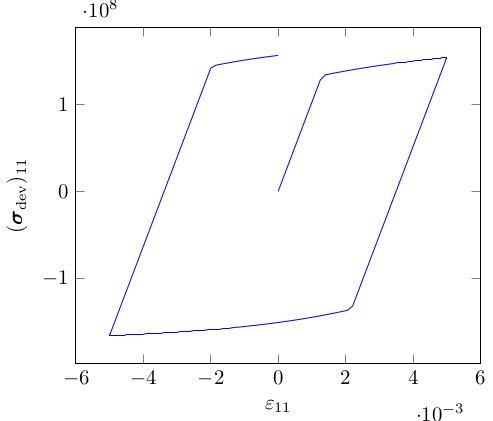

In [8]:
p = @pgf Axis({xlabel=L"\varepsilon_{11}", ylabel=L"(\boldsymbol{\sigma}_\mathrm{dev})_{11}"},
    PlotInc({mark="none"},
        Coordinates([r.ε[1,1] for r in res],
                    [dev(r.σ)[1,1] for r in res])
    ),
)

### vonMises

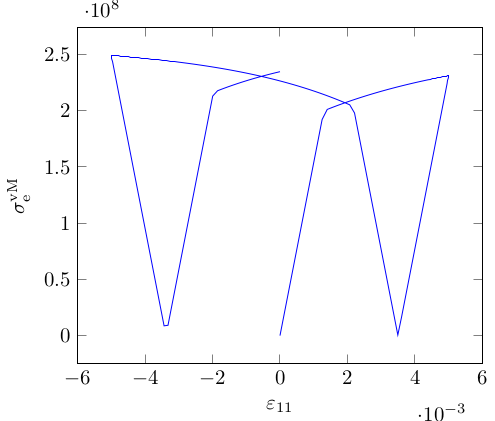

In [9]:
p = @pgf Axis({xlabel=L"\varepsilon_{11}", ylabel=L"\sigma_\mathrm{e}^\mathrm{vM}"},
    PlotInc({mark="none"},
        Coordinates([r.ε[1,1] for r in res],
                    [mise(r.σ) for r in res])
    ),
)

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*